In [2]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell

import plotly.figure_factory as ff
import plotly.express as px

InteractiveShell.ast_node_interactivity = "all"

sns.set(style="darkgrid")

# 1. Analysis on Wildfire Data

## Reading the Data

In [2]:
fires = pd.read_csv('../data/processed_data/fire_daily.csv.gz', parse_dates=['acq_date'])
fires.head()

,latitude,longitude,acq_date,satellite,instrument,confidence
0,36.00,43.38,2016-11-25,Aqua,MODIS,62
1,36.00,43.42,2016-11-13,Terra,MODIS,71
2,36.00,43.89,2016-06-10,Terra,MODIS,100
3,36.01,36.34,2016-09-20,Terra,MODIS,65
4,36.01,37.20,2016-04-23,Aqua,MODIS,95


## Defining helper functions
Here we are defining functions for floor-rounding lat-lon values (casting them as integers), to analyse wildfire occurrences in bins.

In [3]:
def latitude_wfire_counter(df):
    fires["lat_int"] = fires["latitude"].astype(int)
    lat_fire_df = df[["lat_int", "confidence"]].groupby(["lat_int"]).count().\
                reset_index().rename(columns={"lat_int": "Latitude", "confidence": "Wildfire Count"})
    lat_fire_df["Latitude"] = lat_fire_df["Latitude"].astype(str) + " - " + (lat_fire_df["Latitude"]+0.99).astype(str)
    return lat_fire_df

def longitude_wfire_counter(df):
    df["long_int"] = df["longitude"].astype(int)
    lon_fire_df = df[["long_int", "confidence"]].groupby(["long_int"]).count().\
                reset_index().rename(columns={"long_int": "Longitude", "confidence": "Wildfire Count"})
    lon_fire_df["Longitude"] = lon_fire_df["Longitude"].astype(str) + " - " + (lon_fire_df["Longitude"]+0.99).astype(str)
    return lon_fire_df

## Total wildfire count for latitude intervals

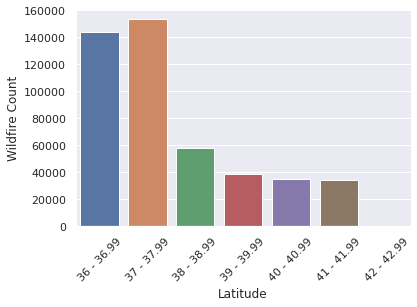

,Latitude,Wildfire Count
0,36 - 36.99,144164
1,37 - 37.99,153443
2,38 - 38.99,57700
3,39 - 39.99,38992
4,40 - 40.99,35032
5,41 - 41.99,34049
6,42 - 42.99,50


In [4]:
lat_fire_df = latitude_wfire_counter(fires)
ax = sns.barplot(x=lat_fire_df["Latitude"], y=lat_fire_df["Wildfire Count"])
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.show()

lat_fire_df

## Total wildfire count for longitude intervals

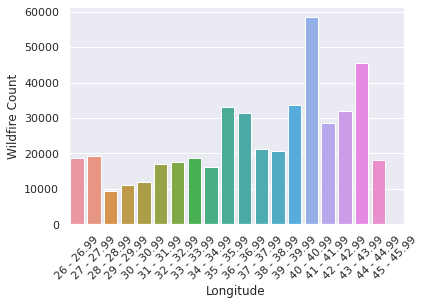

,Longitude,Wildfire Count
0,26 - 26.99,18783
1,27 - 27.99,19245
2,28 - 28.99,9553
3,29 - 29.99,11235
4,30 - 30.99,11845
5,31 - 31.99,17054
6,32 - 32.99,17655
7,33 - 33.99,18831
8,34 - 34.99,16058
9,35 - 35.99,33136


In [5]:
lon_fire_df = longitude_wfire_counter(fires)
ax = sns.barplot(x=lon_fire_df["Longitude"], y=lon_fire_df["Wildfire Count"])
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.show()

lon_fire_df

## Total wildfire count by year for latitude intervals

Latitude - Wildfire Count in 2013


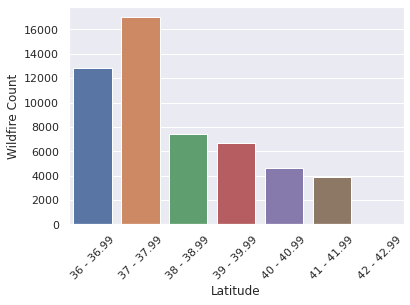

Latitude - Wildfire Count in 2014


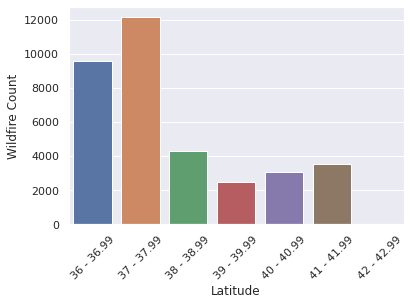

Latitude - Wildfire Count in 2015


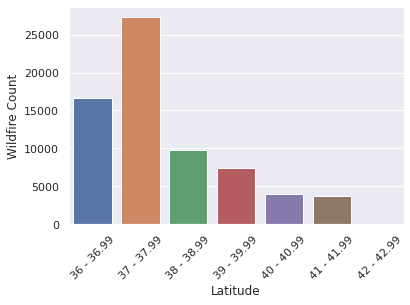

Latitude - Wildfire Count in 2016


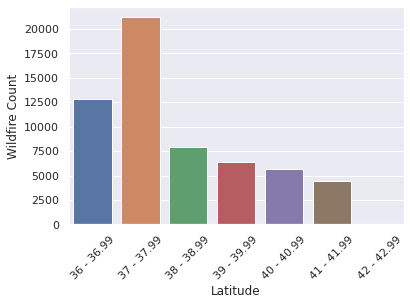

Latitude - Wildfire Count in 2017


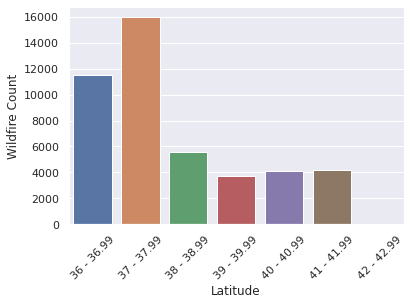

Latitude - Wildfire Count in 2018


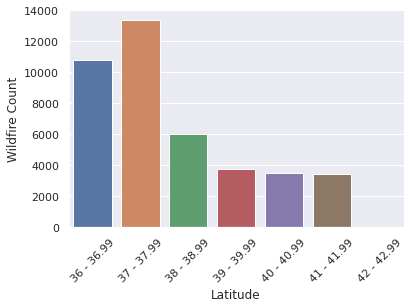

Latitude - Wildfire Count in 2019


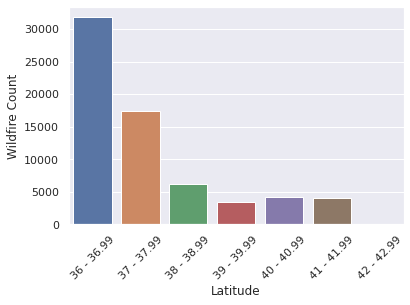

Latitude - Wildfire Count in 2020


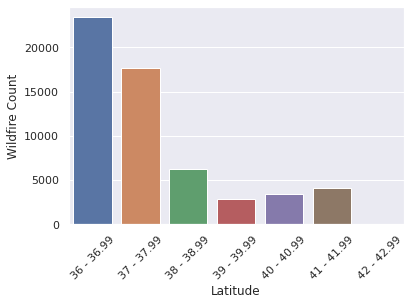

In [6]:
for year in range(2013, 2021, 1):
    print("Latitude - Wildfire Count in", year)
    lat_fire_df = latitude_wfire_counter(fires[fires["acq_date"].dt.year == year].copy())
    ax = sns.barplot(x=lat_fire_df["Latitude"], y=lat_fire_df["Wildfire Count"])
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    plt.show()

## Total wildfire count by year for longitude intervals

Longitude - Wildfire Count in 2013


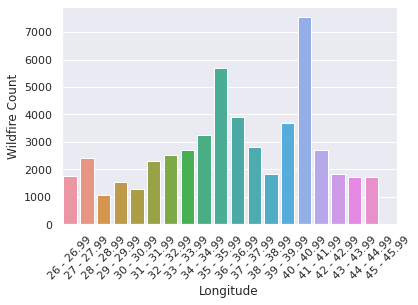

Longitude - Wildfire Count in 2014


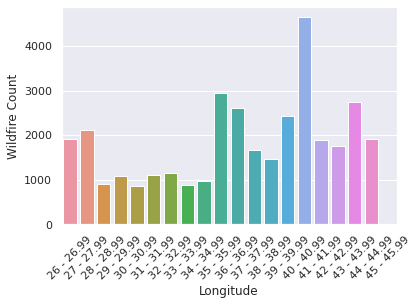

Longitude - Wildfire Count in 2015


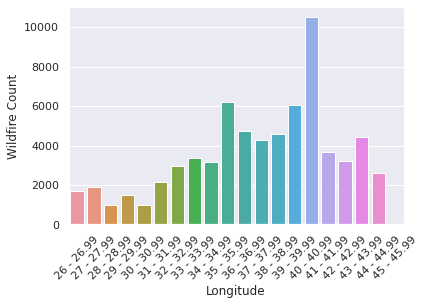

Longitude - Wildfire Count in 2016


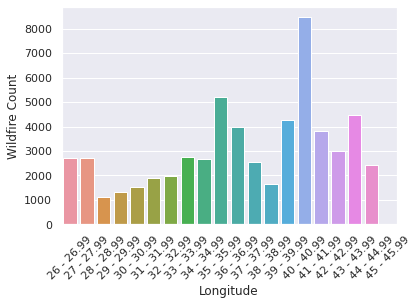

Longitude - Wildfire Count in 2017


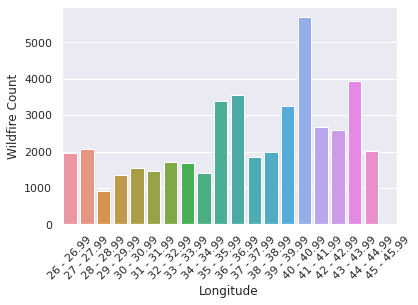

Longitude - Wildfire Count in 2018


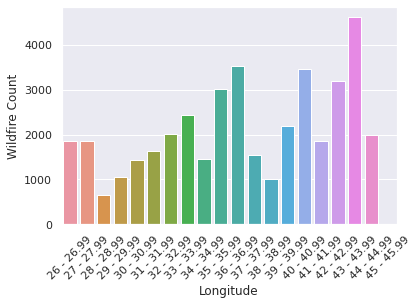

Longitude - Wildfire Count in 2019


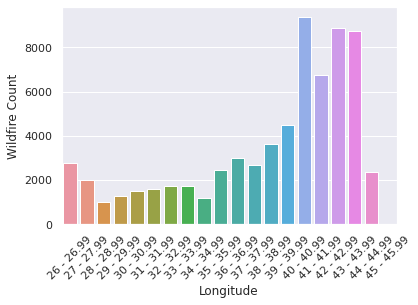

Longitude - Wildfire Count in 2020


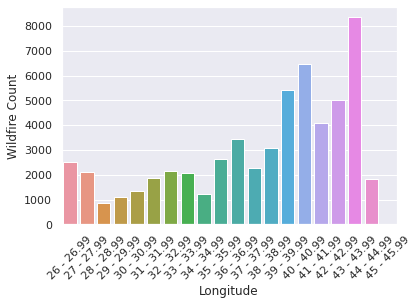

In [7]:
for year in range(2013, 2021, 1):
    print("Longitude - Wildfire Count in", year)
    lon_fire_df = longitude_wfire_counter(fires[fires["acq_date"].dt.year == year].copy())
    ax = sns.barplot(x=lon_fire_df["Longitude"], y=lon_fire_df["Wildfire Count"])
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    plt.show()

## Total wildfire count by year

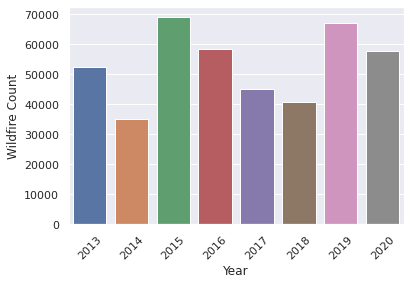

In [8]:
yearly_fire_count = []
years = []

for year in range(2013, 2021, 1):
    yearly_fire_count.append(len(fires[fires["acq_date"].dt.year == year]))
    years.append(year)

yearly_fire_count = np.array(yearly_fire_count)
years = np.array(years)

ax = sns.barplot(x=years, y=yearly_fire_count)
_ = ax.set(xlabel='Year', ylabel='Wildfire Count')

for item in ax.get_xticklabels():
    item.set_rotation(45)
    
plt.show()

## Total wildfire count by month

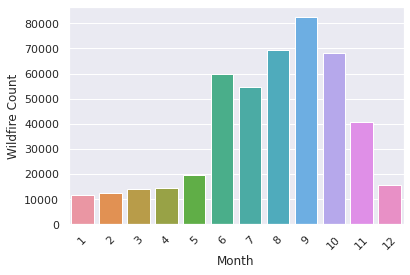

In [9]:
monthly_fire_count = []
months = []

for month in range(1, 13, 1):
    monthly_fire_count.append(len(fires[fires["acq_date"].dt.month == month]))
    months.append(month)

monthly_fire_count = np.array(monthly_fire_count)
months = np.array(months)

ax = sns.barplot(x=months, y=monthly_fire_count)
_ = ax.set(xlabel='Month', ylabel='Wildfire Count')

for item in ax.get_xticklabels():
    item.set_rotation(45)
    
plt.show()

## Distribution of detection confidence

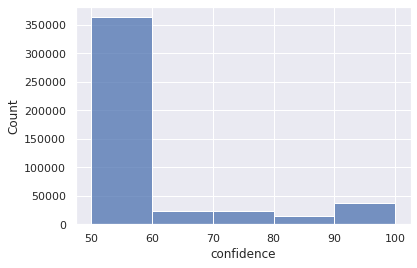

In [10]:
ax = sns.histplot(x=fires["confidence"], bins=5)
plt.show()

## Sample count of satellite types

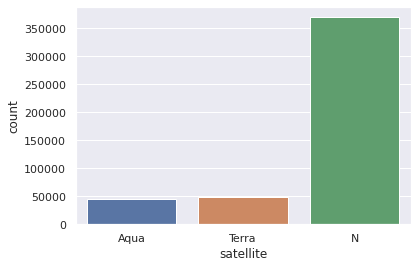

In [11]:
ax = sns.countplot(x=fires["satellite"])
plt.show()

## Sample count of instrument types

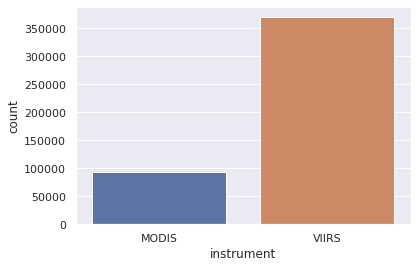

In [12]:
ax = sns.countplot(x=fires["instrument"])
plt.show()

# 2. Analysis on Temperature Data

## Reading the Data

In [13]:
temp_df = pd.read_csv('../data/processed_data/temperatures.csv')
temp_df = temp_df.rename(columns={"latitude":"latitude_rounded",
                                 "longitude":"longitude_rounded"})
temp_df["month"] = temp_df["month"].astype(int)
temp_df["year"] = temp_df["year"].astype(int)

temp_df.head()

,longitude_rounded,latitude_rounded,month,year,temperature_min,temperature_max,temperature_avg
0,41.5,39.5,1,2010,-9.653281,0.584216,-4.722202
1,41.5,39.5,1,2011,-12.800349,-0.425585,-6.618499
2,41.5,39.5,1,2012,-14.500847,-2.926380,-8.831257
3,41.5,39.5,1,2013,-13.762959,-2.342323,-7.790593
4,41.5,39.5,1,2014,-14.346466,-1.696002,-8.878721


Calculating yearly temperature means for latitude-longitude pairs.

In [14]:
yearly_means = temp_df.groupby(["longitude_rounded", "latitude_rounded", "year"]).mean()\
               .drop("month", axis=1).reset_index()
yearly_means.head()

,longitude_rounded,latitude_rounded,year,temperature_min,temperature_max,temperature_avg
0,26.5,37.5,2010,14.058078,25.218401,19.732844
1,26.5,37.5,2011,12.526236,23.874211,18.137017
2,26.5,37.5,2012,10.485386,21.942438,16.268828
3,26.5,37.5,2013,13.048908,24.470545,18.863189
4,26.5,37.5,2014,13.774523,25.042523,19.322291


Calculating monthly temperature means for latitude-longitude pairs.

In [15]:
monthly_means = temp_df.groupby(["longitude_rounded", "latitude_rounded", "month"]).mean()\
               .drop("year", axis=1).reset_index()
monthly_means.head()

,longitude_rounded,latitude_rounded,month,temperature_min,temperature_max,temperature_avg
0,26.5,37.5,1,5.379282,16.985875,11.563072
1,26.5,37.5,2,5.687182,18.276289,12.080855
2,26.5,37.5,3,7.893290,19.738563,13.815538
3,26.5,37.5,5,14.963395,26.711964,20.476336
4,26.5,37.5,7,21.473905,32.794598,27.029087


## Yearly temperature means for Turkey

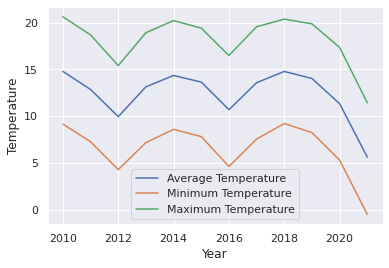

In [16]:
turkey_yearly_means = yearly_means.groupby("year").mean().reset_index()

ax = sns.lineplot(data=turkey_yearly_means, x="year", y="temperature_avg", label="Average Temperature")
ax_2 = sns.lineplot(data=turkey_yearly_means, x="year", y="temperature_min", label="Minimum Temperature")
ax_3 = sns.lineplot(data=turkey_yearly_means, x="year", y="temperature_max", label="Maximum Temperature")
ax = ax.set(xlabel='Year', ylabel='Temperature')
plt.show()

## Monthly temperature means for Turkey

Maximum Temperature by year


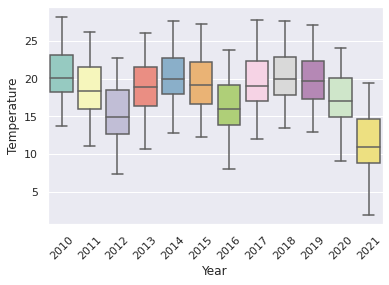

Minimum Temperature by year


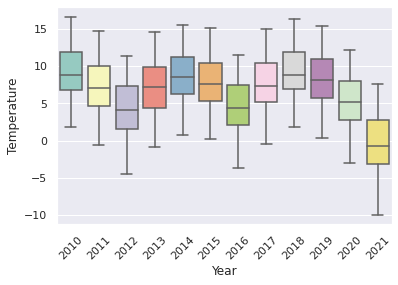

Average Temperature by year


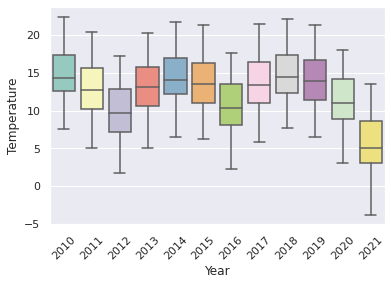

In [17]:
cols = ["temperature_max", "temperature_min", "temperature_avg"]
col_labels = ["Maximum Temperature", "Minimum Temperature", "Average Temperature"]

for col_i, col in enumerate(cols):
    print(col_labels[col_i], "by year")
    ax = sns.boxplot(x="year", y=col, data=yearly_means, palette="Set3")
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    ax = ax.set(xlabel='Year', ylabel='Temperature')
    plt.show()

## Temperature distribution for latitude and longitude
The distributions are brought from all the data.

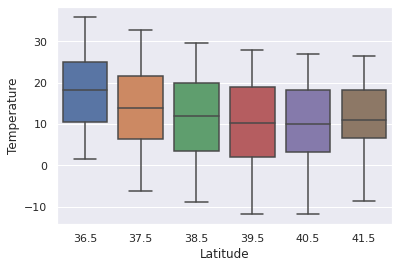

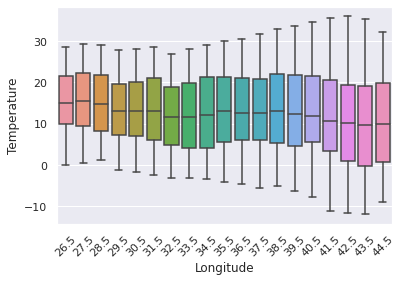

In [18]:
ax = sns.boxplot(data=temp_df, x="latitude_rounded", y="temperature_avg")
ax = ax.set(xlabel='Latitude', ylabel='Temperature')
plt.show()

ax = sns.boxplot(data=temp_df, x="longitude_rounded", y="temperature_avg")
for item in ax.get_xticklabels():
        item.set_rotation(45)
ax = ax.set(xlabel='Longitude', ylabel='Temperature')
plt.show()

## Minimum, maximum and average temperatures for each month
Taking the average of the monthly temperature data by years.

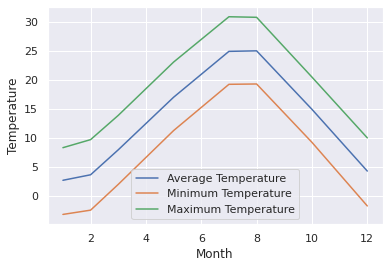

In [19]:
turkey_monthly_means = monthly_means.groupby("month").mean().reset_index()

ax = sns.lineplot(data=turkey_monthly_means, x="month", y="temperature_avg", label="Average Temperature")
ax_2 = sns.lineplot(data=turkey_monthly_means, x="month", y="temperature_min", label="Minimum Temperature")
ax_3 = sns.lineplot(data=turkey_monthly_means, x="month", y="temperature_max", label="Maximum Temperature")
ax = ax.set(xlabel='Month', ylabel='Temperature')
plt.show()

## Minimum, maximum and average temperature distributions for each month
Monthly temperature values are brought from all years.

Maximum Temperature by month


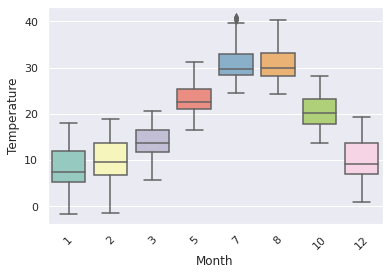

Minimum Temperature by month


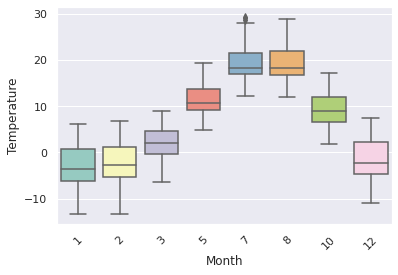

Average Temperature by month


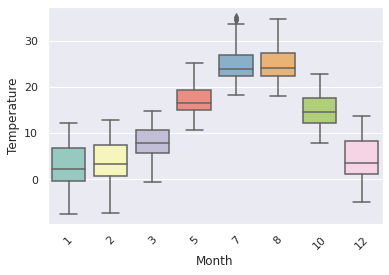

In [20]:
cols = ["temperature_max", "temperature_min", "temperature_avg"]
col_labels = ["Maximum Temperature", "Minimum Temperature", "Average Temperature"]

for col_i, col in enumerate(cols):
    print(col_labels[col_i], "by month")
    ax = sns.boxplot(x="month", y=col, data=monthly_means, palette="Set3")
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    ax = ax.set(xlabel='Month', ylabel='Temperature')
    plt.show()

# 3. Analysis on Final Training Data

## Reading the Data

In [3]:
full_df = pd.read_csv('../data/train_val_test_data/full_data.csv')
full_df.head()

,latitude,longitude,year,month,fire_cnt,fire,fire_cnt_before,fire_before,fire_cnt_last_year,fire_last_year,fire_cnt_last_year_same_month,fire_last_year_same_month,latitude_rounded,longitude_rounded,temperature_min,temperature_max,temperature_avg
0,36.0,26.0,2013,7,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,36.5,26.5,NaN,NaN,NaN
1,36.0,26.0,2013,6,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,36.5,26.5,NaN,NaN,NaN
2,36.0,26.0,2013,8,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,36.5,26.5,NaN,NaN,NaN
3,36.0,26.0,2013,9,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,36.5,26.5,NaN,NaN,NaN
4,36.0,26.0,2013,5,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,36.5,26.5,NaN,NaN,NaN


In [47]:
corr = full_df.corr()
fig = px.imshow(corr, aspect="auto", color_continuous_scale=px.colors.sequential.RdBu)
fig.show()

In [49]:
feature_label_corr = full_df.corr()[["fire"]].drop(index='fire')
fig = px.imshow(feature_label_corr, aspect="auto", color_continuous_scale=px.colors.sequential.RdBu)
fig.show()